In [1]:
%load_ext lab_black

In [2]:
import math
import random

import numpy as np


class WOA:
    def __init__(
        self,
        whale_max,  # クジラの数
        a_decrease=0.001,  # 変数aの減少値
        logarithmic_spiral=1,  # 対数螺旋の係数
    ):
        self.whale_max = whale_max
        self.a_decrease = a_decrease
        self.logarithmic_spiral = logarithmic_spiral

    def init(self, problem):
        self.problem = problem

        self.best_whale = None
        self.whales = []
        for _ in range(self.whale_max):
            o = problem.create()
            self.whales.append(o)

            if (
                self.best_whale is None
                or self.best_whale.getScore() < o.getScore()
            ):
                self.best_whale = o.copy()
        self._a = 2

    def step(self):

        for whale in self.whales:
            pos = np.asarray(whale.getArray())

            if random.random() < 0.5:
                r1 = np.random.rand(self.problem.size)  # 0-1の乱数
                r2 = np.random.rand(self.problem.size)  # 0-1の乱数

                A = (2.0 * np.multiply(self._a, r1)) - self._a
                C = 2.0 * r2

                if np.linalg.norm(A) < 1:
                    # 獲物に近づく
                    new_pos = self.best_whale.getArray()
                else:
                    # 獲物を探す
                    new_pos = self.whales[
                        random.randint(0, len(self.whales) - 1)
                    ].getArray()
                new_pos = np.asarray(new_pos)

                D = np.linalg.norm(np.multiply(C, new_pos) - pos)
                pos = new_pos - np.multiply(A, D)

            else:
                # 回る
                best_pos = np.asarray(self.best_whale.getArray())

                D = np.linalg.norm(best_pos - pos)
                L = np.random.uniform(-1, 1, self.problem.size)  # [-1,1]の乱数

                _b = self.logarithmic_spiral
                pos = (
                    np.multiply(
                        np.multiply(D, np.exp(_b * L)), np.cos(2.0 * np.pi * L)
                    )
                    + best_pos
                )

            whale.setArray(pos)
            if self.best_whale.getScore() < whale.getScore():
                self.best_whale = whale.copy()

        self._a -= self.a_decrease
        if self._a < 0:
            self._a = 0

    def spiral(self, x, L):
        return (
            x * np.exp(self.logarithmic_spiral * L) * np.cos(2.0 * np.pi * L)
        )

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


def main1():

    MIN = -1
    MAX = 1
    N = 10000

    plt.figure()

    N2 = 5
    for j in range(N2):
        MIN2 = 0
        MAX2 = 2
        d = MIN2 + ((1 + j) / N2) * (MAX2 - MIN2)
        ff = WOA(1, logarithmic_spiral=1)

        dx = []
        dy = []
        for i in range(N):
            x = MIN + (i / N) * (MAX - MIN)
            y = ff.spiral(d, L=x)
            dx.append(x)
            dy.append(y)
        plt.plot(dx, dy, label="d={:.2f}".format(d))

    plt.legend()
    plt.grid()
    plt.xlabel("L")
    plt.ylabel("sprial")
    # tmp_dir = os.path.join(os.path.dirname(__file__), '..', 'tmp')
    # path = os.path.join(tmp_dir, "{}_2.png".format(func_cls.__name__))
    # print(path)
    # plt.savefig(path)
    plt.show()


def main2():

    MIN = -1
    MAX = 1
    N = 10000

    plt.figure()

    N2 = 5
    for j in range(N2):
        MIN2 = 0
        MAX2 = 1
        logarithmic_spiral = MIN2 + ((1 + j) / N2) * (MAX2 - MIN2)
        ff = WOA(1, logarithmic_spiral=logarithmic_spiral)

        dx = []
        dy = []
        for i in range(N):
            x = MIN + (i / N) * (MAX - MIN)
            y = ff.spiral(1, L=x)
            dx.append(x)
            dy.append(y)
        plt.plot(
            dx,
            dy,
            label="logarithmic_spiral={:.2f}".format(logarithmic_spiral),
        )

    plt.legend()
    plt.grid()
    plt.xlabel("L")
    plt.ylabel("sprial")
    # tmp_dir = os.path.join(os.path.dirname(__file__), '..', 'tmp')
    # path = os.path.join(tmp_dir, "{}_2.png".format(func_cls.__name__))
    # print(path)
    # plt.savefig(path)
    plt.show()

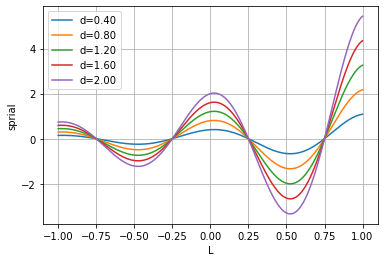

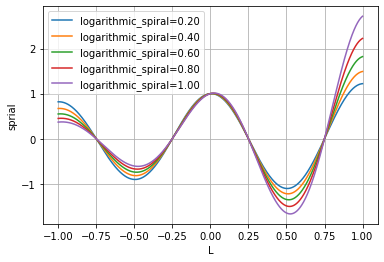

In [4]:
if __name__ == "__main__":
    main1()
    main2()